In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

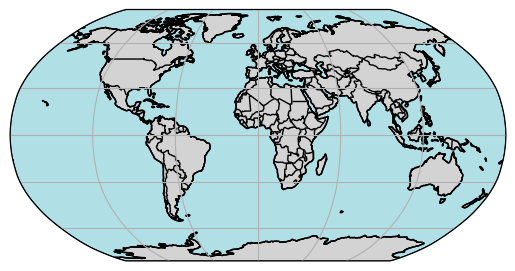

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='powderblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')

In [30]:
import numpy as np

path = '/home/kajiyama/H08/H08_20230612/map/dat/wsi_lst.npy'
citypath = '/home/kajiyama/H08/H08_20230612/map/dat/cty_lst_/cityrange_list_temp.txt'
wsi_lst = np.load(path)

with open(citypath, "r") as input_file:
    lines = input_file.readlines()

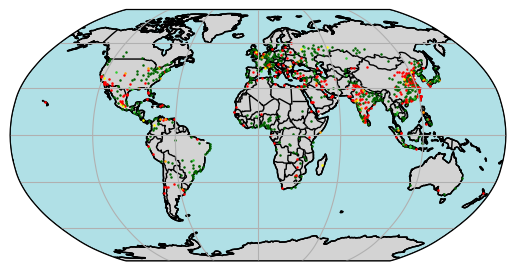

In [41]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
ax.set_global()

for i in range(900):
    line = lines[i]
    line = line.strip()
    parts = line.split()
    lonmin = float(parts[6])
    lonmax = float(parts[7])
    latmin = float(parts[8])
    latmax = float(parts[9])
    
    loncnt = (lonmax - lonmin)/2 + lonmin
    latcnt = (latmax - latmin)/2 + latmin
    
    wsi = wsi_lst[i]
    if 0<wsi<=0.1:
        color = 'darkgreen'
    elif 0.1<wsi<=0.2:
        color = 'limegreen'
    elif 0.2<wsi<=0.3:
        color = 'yellow'
    elif 0.3<wsi<=0.4:
        color = 'orange'
    elif 0.4<wsi:
        color = 'red'
    else:
        color = 'white'
        
    ax.plot(loncnt, latcnt, 'o', markersize=0.8, color=color, transform=ccrs.PlateCarree())
    
    
ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='powderblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')